# Playgrounds
***

The purpose of this submetric is to record the quantity of playgrounds for each of Pittsburgh's neighborhoods.

With our overall metric being the best neighborhood to start a family in, it would be logical for a family to pick a neighborhood that is abundant
with playgrounds so they can keep their children entertained.

In [8]:
# Load modules
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

In [9]:
# Load playground data from WPRDC
playground_data = pd.read_csv("Pittsburgh Playgrounds.csv", index_col="id")

playground_data.sample(10)

,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
id,,,,,,,,,,,,,,,,
966240511,Brighton Heights Playground,NaN,Parks - Northern,Brighton Heights Park,BRIGHTON WOODS RD,https://tools.wprdc.org/images/pittsburgh/play...,Brighton Heights,1,27,42003270800,1,27,1,14-Jan,40.486669,-80.031856
1199980206,Phillips Lower Playground,NaN,NaN,NaN,NaN,NaN,Carrick,4,29,42003290400,3,29,3,23-Apr,40.388144,-79.990309
1097984790,McGonigle Playground,NaN,Parks - Western,McGonigle Park,ALLENDALE ST,https://tools.wprdc.org/images/pittsburgh/play...,Sheraden,2,20,42003562500,5,20,6,16-Jan,40.459768,-80.065136
289346967,Oakwood Playground,NaN,Parks - Western,Oakwood Park,DURBIN ST,https://tools.wprdc.org/images/pittsburgh/play...,Oakwood,2,28,42003562800,5,28,6,19-Jan,40.426045,-80.066946
815926730,Woods Run Playground,NaN,Parks - Northern,Woods Run Park,CENTRAL AVE,https://tools.wprdc.org/images/pittsburgh/play...,Marshall-Shadeland,1,27,42003271500,1,27,1,14-Jan,40.476348,-80.029265
1328645355,Rhododendron Playground,NaN,Parks - Northeast,Highland Park,LAKE DR,https://tools.wprdc.org/images/pittsburgh/play...,Highland Park,7,11,42003980100,2,11,5,9-Mar,40.479204,-79.910617
2048022362,Cross and Strauss Playground,NaN,Parks - Northern,Cross and Strauss Park,CROSS ST,https://tools.wprdc.org/images/pittsburgh/play...,Perry South,6,26,42003261400,1,26,1,12-Jan,40.465154,-80.020084
387216005,Spring Hill Playground,NaN,Parks - Northern,Spring Hill Park,SOUTH SIDE AVE,https://tools.wprdc.org/images/pittsburgh/play...,Spring Hill-City View,1,26,42003262000,1,26,1,11-Jan,40.470107,-79.993665
1242899117,Dunbar Playground,NaN,Parks - Western,Dunbar Park,CLAIRHAVEN ST,https://tools.wprdc.org/images/pittsburgh/play...,Crafton Heights,2,28,42003281500,5,28,6,18-Jan,40.439351,-80.051999


```.sample ``` is used to to print a random set of rows just to check dataset is being read properly.
***

In [10]:
# Globally set printing options so all rows and columns are printed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Create new dataframe for the number of playgrounds in each neighborhood
playground_count = playground_data.groupby(by=['neighborhood'])['park'].count().reset_index(name='count').sort_values(by='count', ascending=False)
playground_count.head(68)

,neighborhood,count
56,Squirrel Hill South,8
4,Beechview,5
52,South Side Slopes,5
0,Allegheny Center,4
49,Sheraden,4
5,Beltzhoover,4
29,Highland Park,4
20,East Liberty,3
28,Hazelwood,3
16,Crawford-Roberts,3


# Data Visualization
***

## Pie Chart

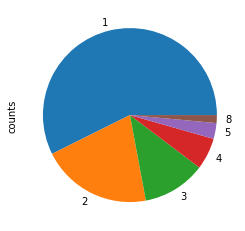

In [5]:
playground_count = playground_data['neighborhood'].value_counts().rename_axis('neighborhood').reset_index(name='counts')
playground_count["counts"].value_counts().sort_index().plot.pie(y='counts', subplots=False, figsize=(8, 4))

## Bar Graph

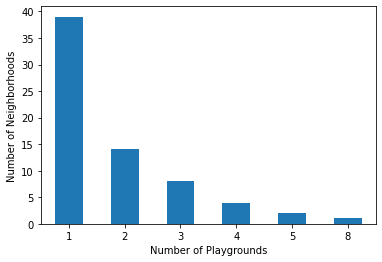

In [6]:
playground_count["counts"].value_counts().sort_index().plot(kind='bar', rot=0, xlabel = "Number of Playgrounds", ylabel = "Number of Neighborhoods")

## Map

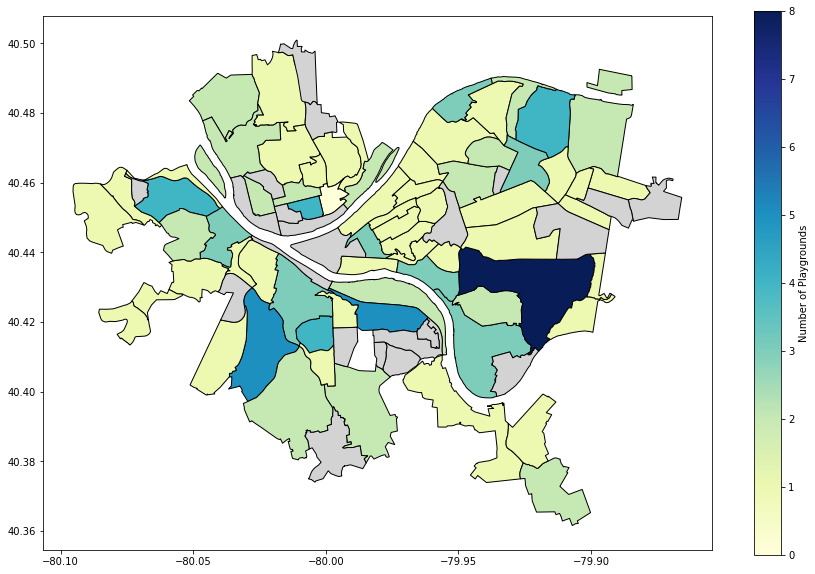

In [11]:
# import dataset
playgrounds = pd.read_csv("Playground Count.csv")
# filter to important info
playgrounds_data = playgrounds.groupby("Neighborhood").sum()['Number of Playgrounds']
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
playground_map = neighborhoods.merge(playgrounds_data, how='left', left_on='hood', right_on='Neighborhood')
playground_map.plot(column='Number of Playgrounds', # set the data to be used for coloring
               cmap='YlGnBu',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Playgrounds"}, # label the legend
               figsize=(15, 10),         # set the size
                    
               missing_kwds={"color": "lightgrey"} # set districts with no data to gray
               )

No data recorded/No playgrounds for:

Chartiers City, Ridgemont, Overbrook, Knoxville, South Shore, Mt. Oliver, St. Clair, Arlington, Arlington Heights, Glen Hazel, Point Breeze, 
Homewood South, East Hills, Friendship, North Oakland, Central Business District, North Shore,Allegheny West, Chateau, California Kirkbride,
Northview Heights, and Summer Hill

# Final Ranking
***

In [12]:
playground_df = playground_data['neighborhood'].value_counts().rename_axis('neighborhood').reset_index(name='counts')
playground_df_index = playground_df.reset_index().set_index('index', drop=False)
playground_df_index = playground_df_index.rename(columns={'index':'playground_rank'})[['playground_rank', 'neighborhood']]
playground_df_index.head(5)

,playground_rank,neighborhood
index,,
0,0,Squirrel Hill South
1,1,Beechview
2,2,South Side Slopes
3,3,Highland Park
4,4,Sheraden


## Squirrel Hill South is the winner for this metric!